Variance expliquée par les premières 2 composantes: [0.27381659 0.45243119]


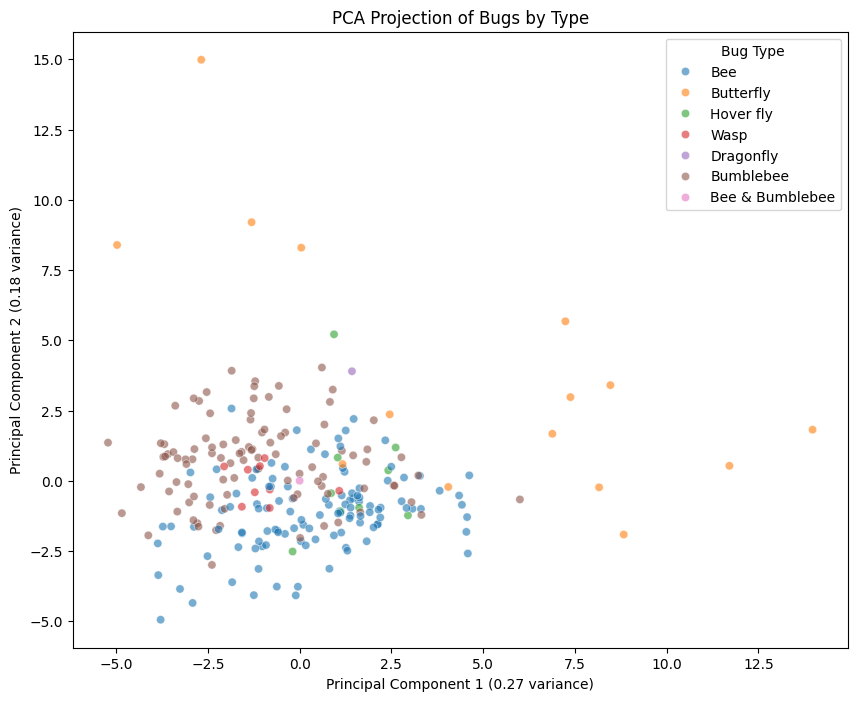

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer la PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Bug Type'] = labels

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par les premières 2 composantes: {explained_variance.cumsum()}")

# Graphique PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Bug Type', data=pca_df, palette='tab10', alpha=0.6)
plt.title('PCA Projection of Bugs by Type')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance)')
plt.legend(title='Bug Type')
plt.show()

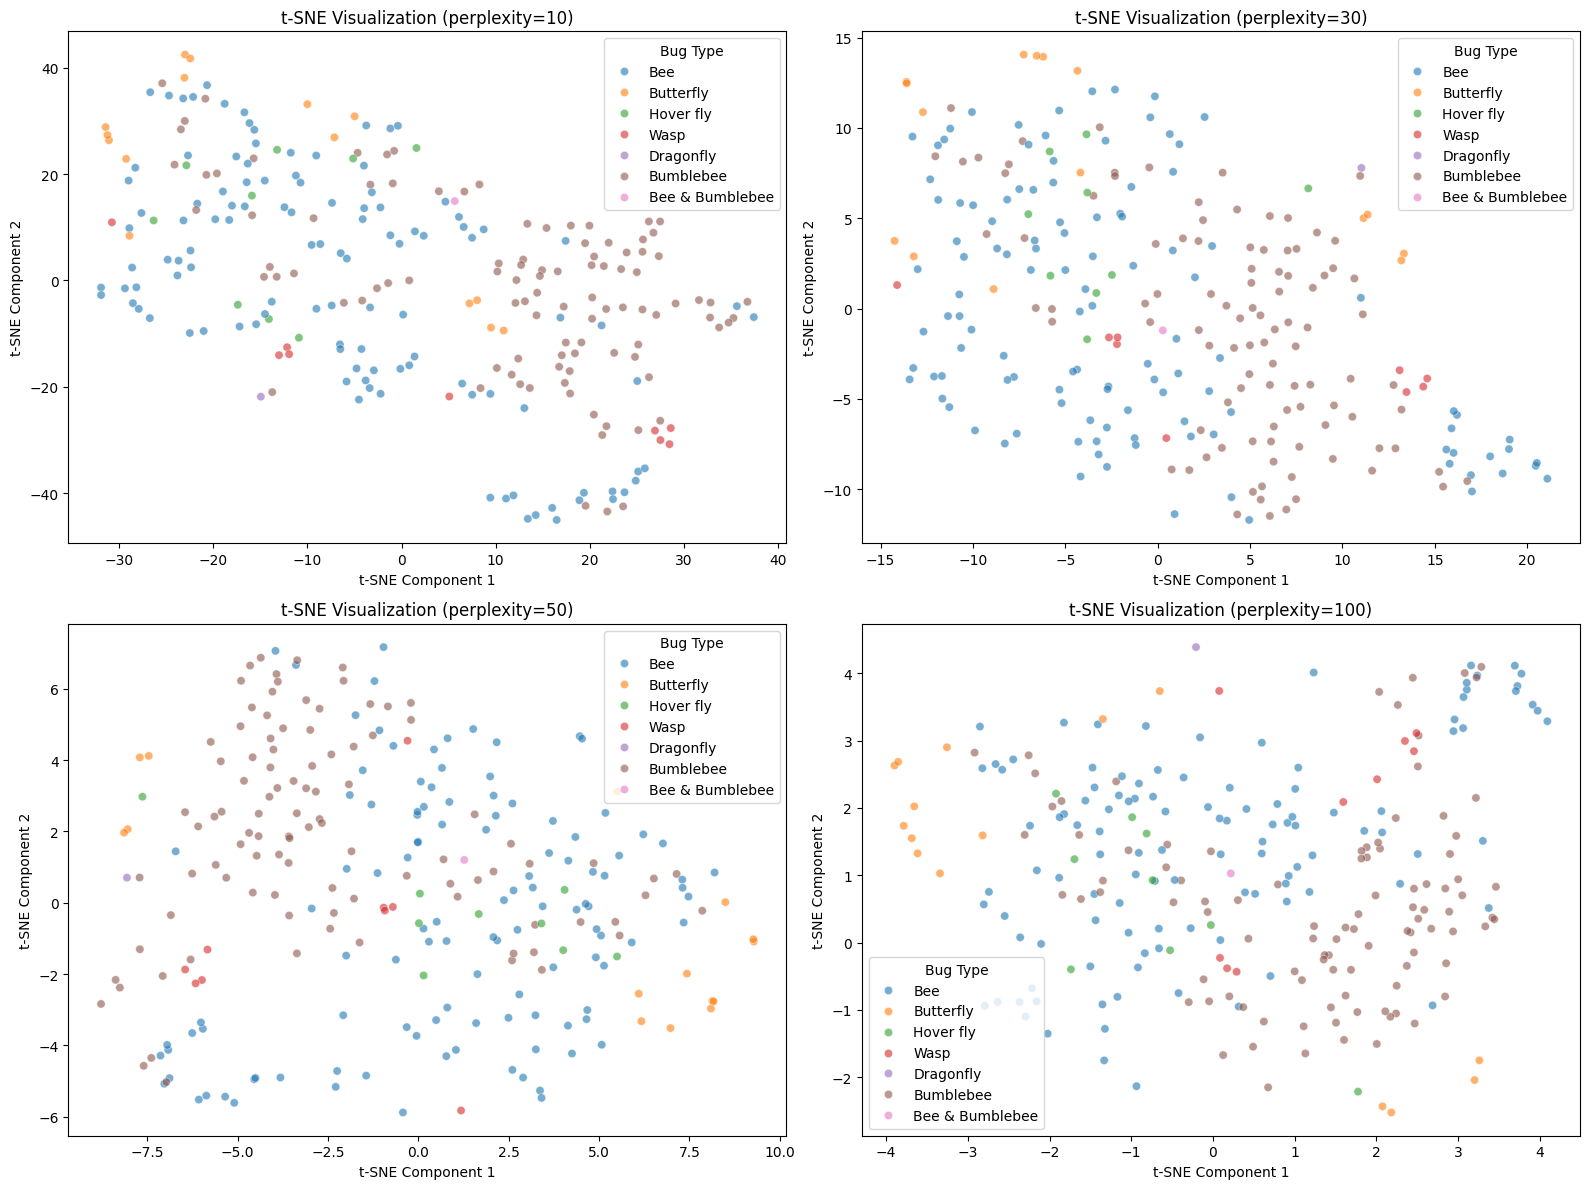

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer la PCA avant t-SNE
pca = PCA(n_components=20)  # Nombre de composantes principales réduit
features_pca = pca.fit_transform(features_scaled)

# Appliquer t-SNE avec différentes valeurs de perplexité
perplexities = [10, 30, 50, 100]

plt.figure(figsize=(16, 12))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features_pca)

    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels, palette=sns.color_palette("tab10", len(np.unique(labels))), alpha=0.6)
    plt.title(f't-SNE Visualization (perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(loc='best', title='Bug Type')

plt.tight_layout()
plt.show()


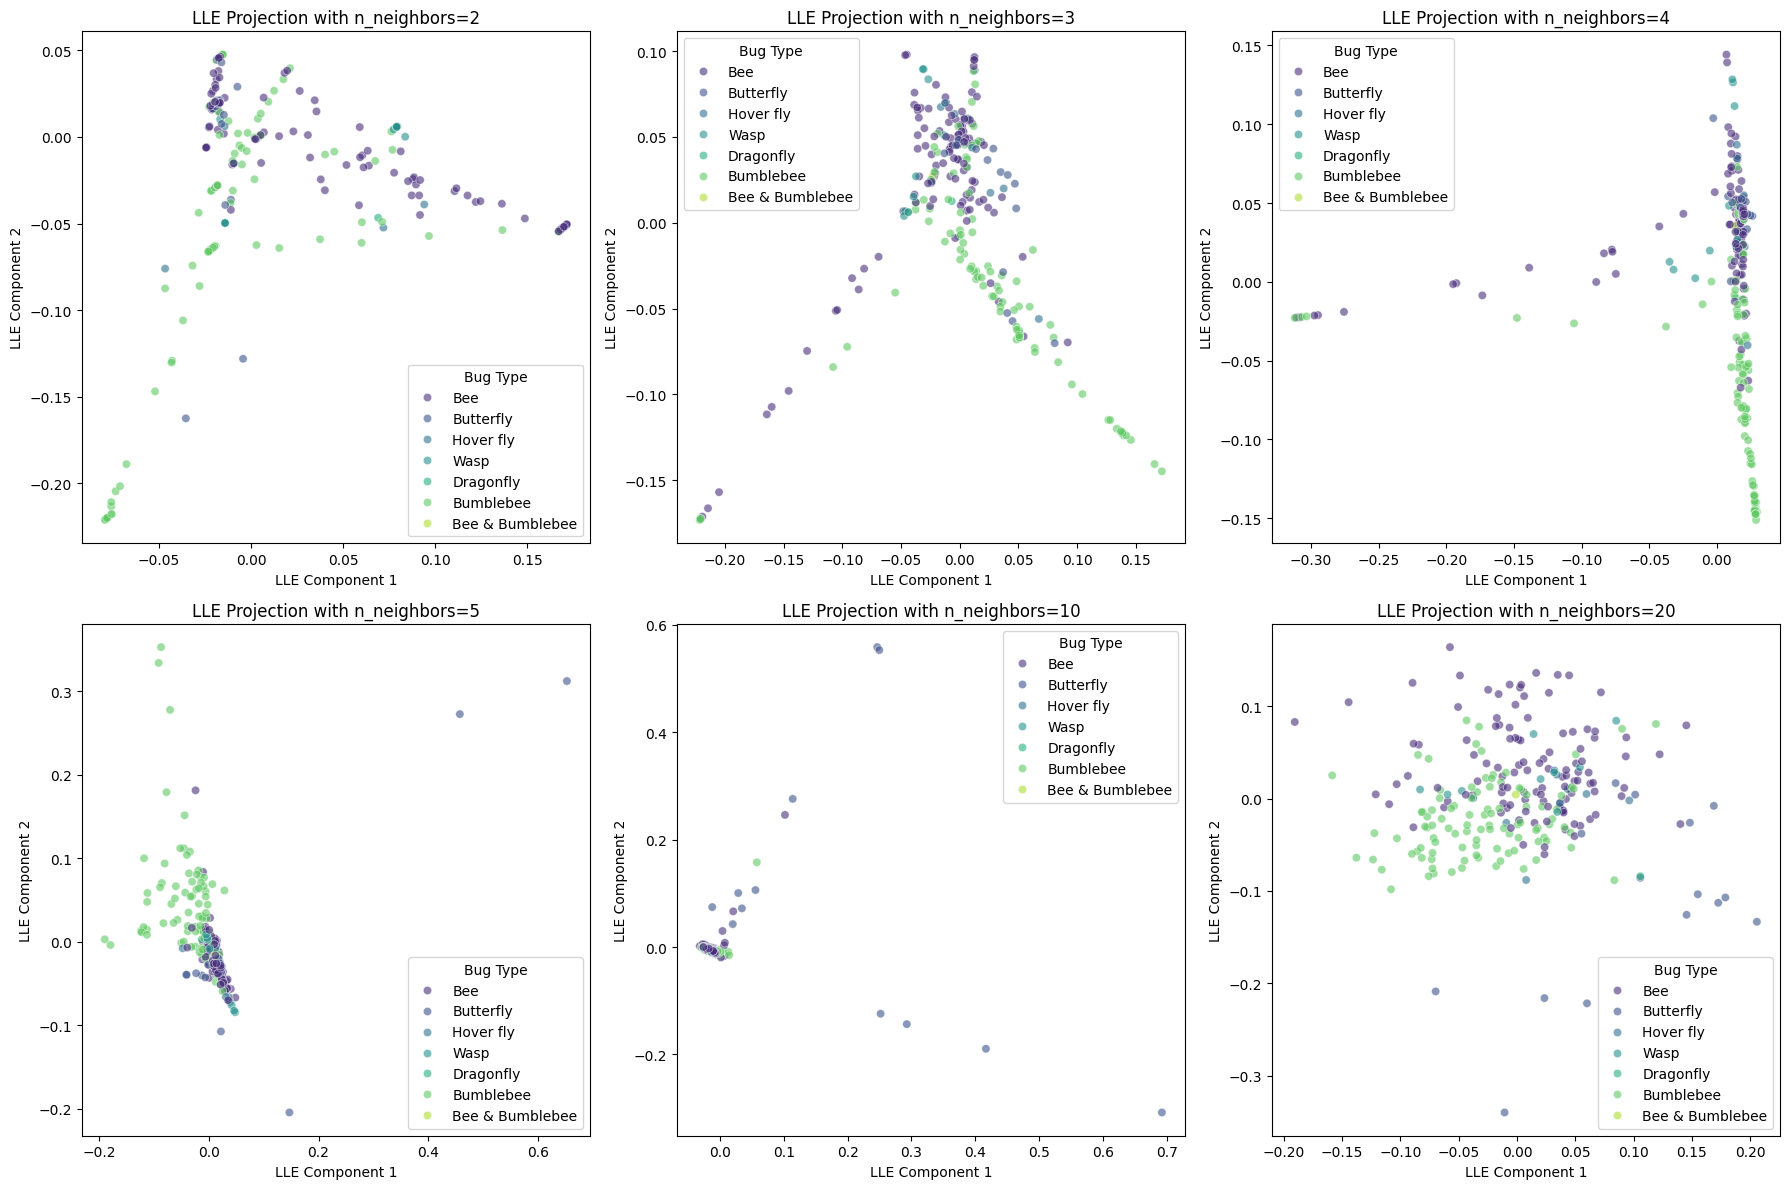

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)


# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Paramètres LLE
neighbors_list = [2, 3, 4, 5, 10, 20]

# Visualiser les résultats pour différentes valeurs de n_neighbors
plt.figure(figsize=(18, 12))
for i, n_neighbors in enumerate(neighbors_list):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors)
    lle_result = lle.fit_transform(features_scaled)
    
    lle_df = pd.DataFrame(data=lle_result, columns=['LLE Component 1', 'LLE Component 2'])
    lle_df['Bug Type'] = labels
    
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x='LLE Component 1', y='LLE Component 2', hue='Bug Type', data=lle_df, palette='viridis', alpha=0.6)
    plt.title(f'LLE Projection with n_neighbors={n_neighbors}')
    plt.xlabel('LLE Component 1')
    plt.ylabel('LLE Component 2')
    plt.legend(title='Bug Type', loc='best')

plt.tight_layout()
plt.show()


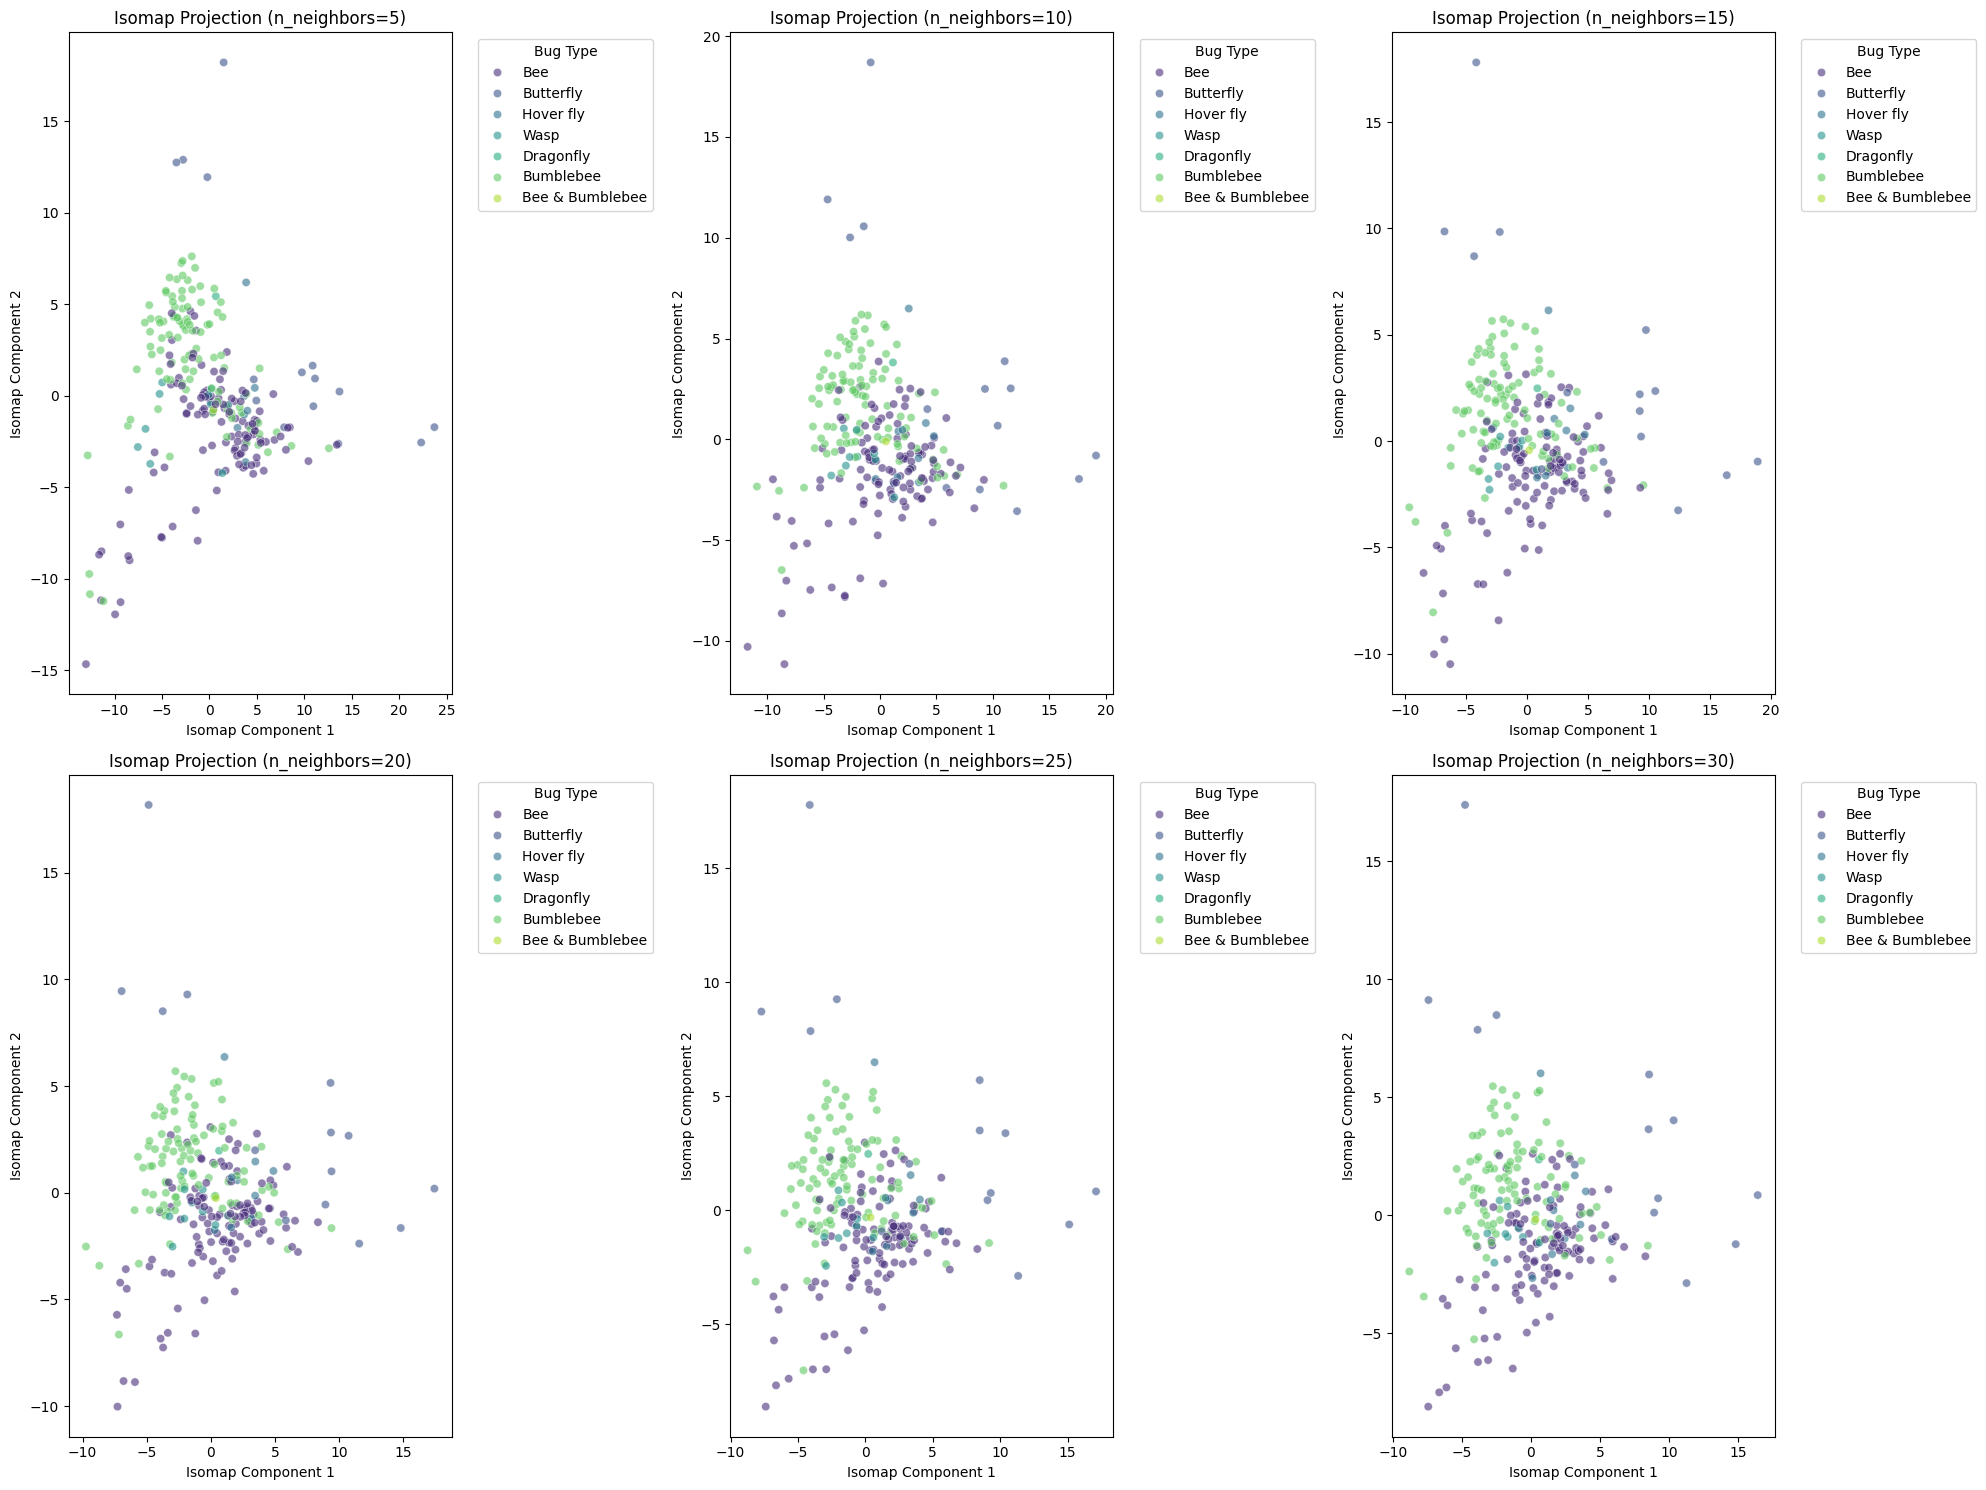

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)


# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Définir différents nombres de voisins pour Isomap
n_neighbors_list = [5, 10, 15, 20, 25, 30]

plt.figure(figsize=(20, 15))

# Appliquer Isomap avec différents nombres de voisins
for i, n_neighbors in enumerate(n_neighbors_list):
    isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
    isomap_result = isomap.fit_transform(features_scaled)
    
    # Créer un DataFrame pour les composantes principales
    isomap_df = pd.DataFrame(data=isomap_result, columns=['Isomap Component 1', 'Isomap Component 2'])
    isomap_df['Bug Type'] = labels
    
    # Graphique Isomap
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x='Isomap Component 1', y='Isomap Component 2', hue='Bug Type', data=isomap_df, palette='viridis', alpha=0.6)
    plt.title(f'Isomap Projection (n_neighbors={n_neighbors})')
    plt.xlabel('Isomap Component 1')
    plt.ylabel('Isomap Component 2')
    plt.legend(title='Bug Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


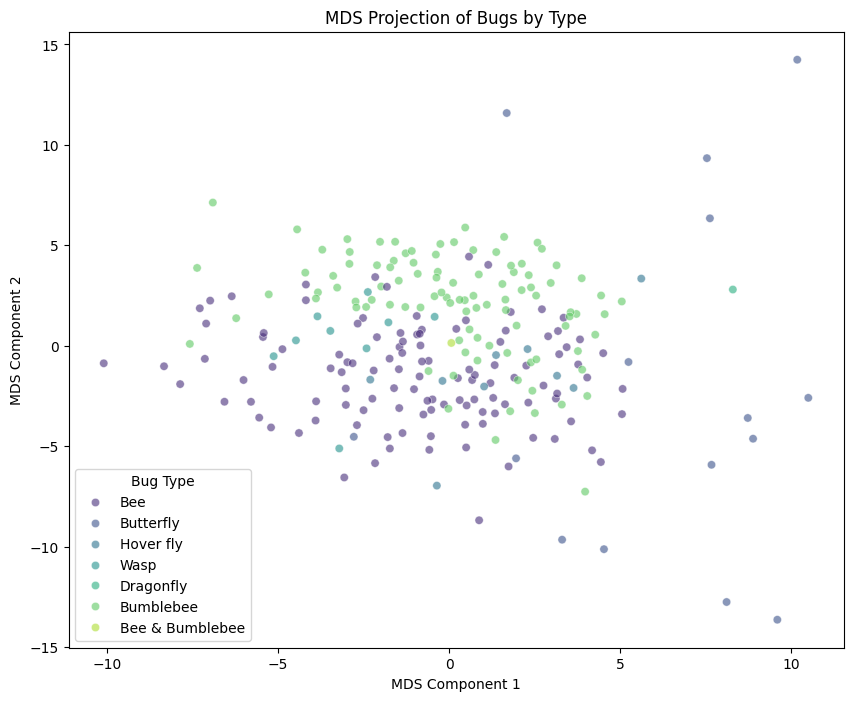

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)


# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer MDS
mds = MDS(n_components=2)
mds_result = mds.fit_transform(features_scaled)

# Créer un DataFrame pour les composantes principales
mds_df = pd.DataFrame(data=mds_result, columns=['MDS Component 1', 'MDS Component 2'])
mds_df['Bug Type'] = labels

# Graphique MDS
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MDS Component 1', y='MDS Component 2', hue='Bug Type', data=mds_df, palette='viridis', alpha=0.6)
plt.title('MDS Projection of Bugs by Type')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Bug Type')
plt.show()


Variance expliquée par les premières 2 composantes: [0.27381659 0.45243119]


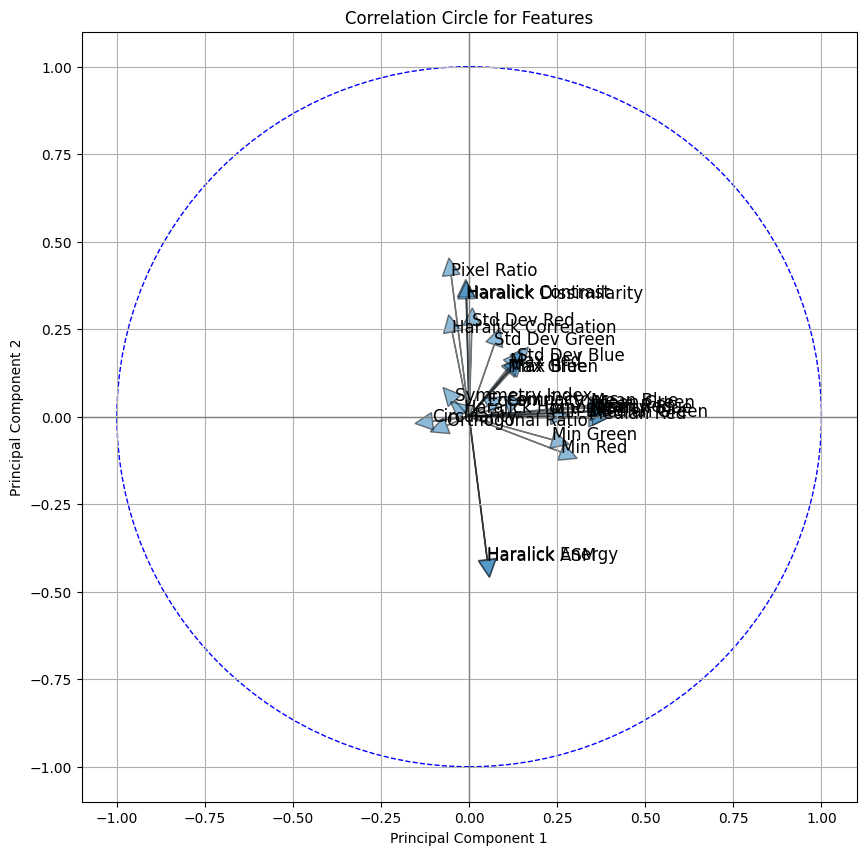

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer la PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Bug Type'] = labels

# Calculer la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par les premières 2 composantes: {explained_variance.cumsum()}")

# Cercle de corrélation pour les variables continues
components = pca.components_

plt.figure(figsize=(10, 10))

# Plot des flèches
for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x, y, features.columns[i], fontsize=12)

# Cercle
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Correlation Circle for Features')
plt.grid()
plt.show()


In [2]:
#kmeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel

file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Ajouter les clusters au DataFrame
data['Cluster'] = clusters

# Afficher les statistiques des clusters
cluster_stats = data.groupby('Cluster').mean()
print(cluster_stats)

# Graphique des clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering of Bugs by Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]